In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project
Moving up to the parent directory
c:\Users\springnuance\Desktop


In [9]:
from stage0_configs import *
info = main_config()

FileNotFoundError: [Errno 2] No such file or directory: 'configs/global_config.xlsx'

In [ ]:
targetPath = info['targetPath'] 
target = pd.read_csv(f"{targetPath}/FD_Curve.csv")
target['force/N'] = target['force/kN'] * 1000
# Save as a csv file
target.to_csv(f"{targetPath}/Force-Displacement.csv", index=False)

[0.0, 0.0300013, 0.0600055, 0.0899964, 0.119974, 0.14993, 0.179882, 0.209834, 0.239786, 0.269773, 0.299776, 0.32978, 0.359783, 0.389786, 0.41979, 0.449789, 0.479764, 0.509665, 0.539566, 0.569467, 0.599481, 0.629625, 0.659766, 0.689906, 0.720051, 0.750191, 0.780331, 0.810476, 0.840617, 0.870757, 0.900902, 0.931042, 0.961187, 0.991327, 1.02147, 1.05161, 1.08175, 1.11148, 1.14121, 1.17094, 1.20067, 1.2304, 1.26013, 1.28986, 1.31959, 1.34931, 1.37904, 1.40877, 1.4385, 1.46823, 1.49823, 1.52853, 1.55882, 1.58911, 1.61941, 1.6497, 1.68, 1.71029, 1.74058, 1.77088, 1.80117, 1.83146, 1.86176, 1.89205, 1.92234, 1.95263, 1.98293, 2.01321, 2.04308, 2.07295, 2.10281, 2.1329, 2.16291, 2.19289, 2.2228, 2.25296, 2.28268, 2.313, 2.34291, 2.3729, 2.40361, 2.43348, 2.46269, 2.49333, 2.52359, 2.55344, 2.58253, 2.61314, 2.64386, 2.67346, 2.70281, 2.73294, 2.76352, 2.79339, 2.82223, 2.85212, 2.88334, 2.91374, 2.944, 2.9728, 3.0016]


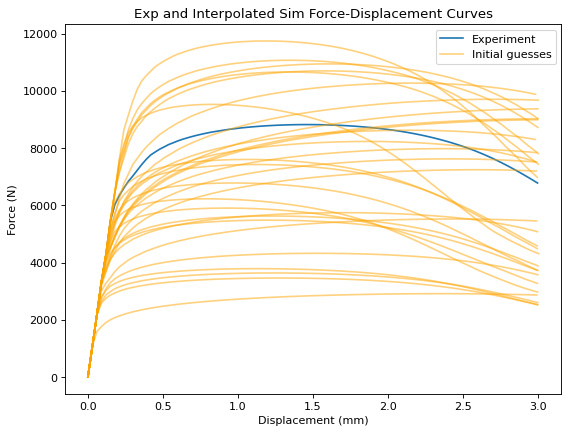

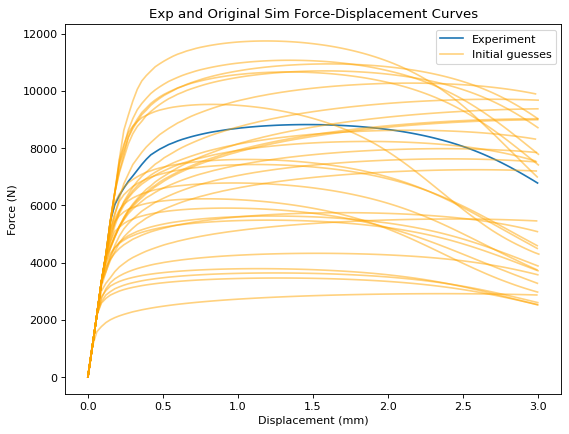

In [ ]:
resultPath = info['resultPath']
targetPath = info['targetPath']
# Load csv file
target = pd.read_csv(f"{targetPath}/FD_Curve.csv")
expForce = target['force/N'].to_numpy()
expDisplacement = target['displacement/mm'].to_numpy() 
#print(max(expDisplacement))
targetCurve = {}
targetCurve['displacement'] = expDisplacement
targetCurve['force'] = expForce

initial_original_FD_Curves = np.load(f"{resultPath}/initial/common/FD_Curves.npy", allow_pickle=True).tolist()
initial_interpolated_FD_Curves = interpolating_FD_Curves(initial_original_FD_Curves, targetCurve)
print(list(initial_interpolated_FD_Curves.values())[0]['displacement'])


# print(maxDisp)
# Plotting all FD curves
figure(figsize=(8, 6), dpi=80)
plt.plot(expDisplacement, expForce, label='Experiment')
for param in initial_interpolated_FD_Curves:
    plt.plot(initial_interpolated_FD_Curves[param]['displacement'], initial_interpolated_FD_Curves[param]['force'], color='orange', alpha=0.5,
             #label=param
             )
plt.plot([],[], color='orange', alpha=0.5, label='Initial guesses')
plt.title('Exp and Interpolated Sim Force-Displacement Curves')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.legend()

# print(maxDisp)
# Plotting all FD curves
figure(figsize=(8, 6), dpi=80)
plt.plot(expDisplacement, expForce, label='Experiment')
for param in initial_original_FD_Curves:
    plt.plot(initial_original_FD_Curves[param]['displacement'], initial_original_FD_Curves[param]['force'], color='orange', alpha=0.5,
             #label=param
             )
plt.plot([],[], color='orange', alpha=0.5, label='Initial guesses')
plt.title('Exp and Original Sim Force-Displacement Curves')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.legend()


In [ ]:
import math

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

def convert_rad_to_deg(rad):
    return rad * 180 / math.pi

90.0
89.9982890176791
[3.12565000e+00 1.07772000e+03 2.17217000e+03 3.31913000e+03
 4.25807000e+03 5.45308000e+03 6.45377000e+03 7.61203000e+03
 8.62381000e+03 9.15010923e+03]
[3.12565000e+00 1.07772000e+03 2.17217000e+03 3.31913000e+03
 4.25807000e+03 5.45308000e+03 6.45377000e+03 7.42919000e+03
 7.89027000e+03 8.36451668e+03]
[3.12565000e+00 1.07772000e+03 2.17217000e+03 3.31913000e+03
 4.25507000e+03 5.09672000e+03 5.68511000e+03 6.23918000e+03
 6.75137000e+03 7.09255653e+03]
[3.12565000e+00 1.07772000e+03 2.17217000e+03 3.31913000e+03
 4.25410000e+03 4.87408000e+03 5.38675000e+03 5.76381000e+03
 6.12692000e+03 6.38848192e+03]


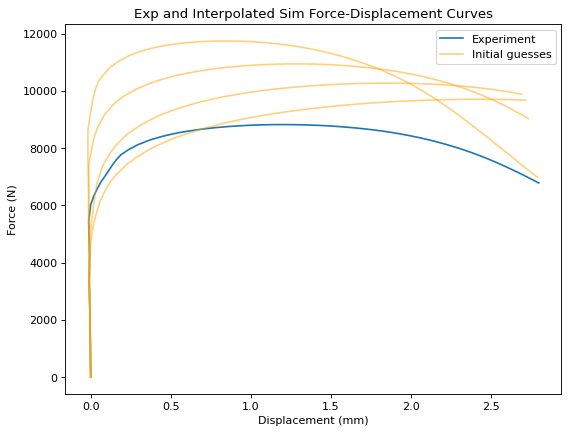

In [21]:
def calculate_yielding_index(targetDisplacement, targetForce, r2_threshold=0.998):
    """
    This function calculates the end of the elastic (linear) region of the force-displacement curve.
    """
    yielding_index = 0

    # Initialize the Linear Regression model
    linReg = LinearRegression()

    for i in range(2, len(targetDisplacement)):
        linReg.fit(targetDisplacement[:i].reshape(-1, 1), targetForce[:i]) 
        simForce = linReg.predict(targetDisplacement[:i].reshape(-1, 1)) 
        r2 = r2_score(targetForce[:i], simForce) 
        if r2 < r2_threshold:  # If R^2 is below threshold, mark the end of linear region
            yielding_index = i - 1
            break
    return yielding_index

figure(figsize=(8, 6), dpi=80)
target_yielding_index = calculate_yielding_index(expDisplacement, expForce)
# Plot vertical line
# Rotating the target curve such that the elastic region stand straight 
# (i.e. the elastic region is overlapping y-axis)

vector1_rad = math.atan2(1, 0)
vector1_deg = convert_rad_to_deg(vector1_rad)
vector2_rad = math.atan2(expForce[target_yielding_index], expDisplacement[target_yielding_index])
vector2_deg = convert_rad_to_deg(vector2_rad)
print(vector1_deg)
print(vector2_deg)
#angleOfRotation = math.atan2(y, x)
#expForce = expDisplacement * sin(angle * pi / 180) + expForce * cos(angle * pi / 180)

rotated_expDisplacement = []
rotated_expForce = []
for i in range(len(expDisplacement)):
    rotated_point = rotate((0, 0), (expDisplacement[i], expForce[i]), np.pi/2-vector2_rad)
    rotated_expDisplacement.append(rotated_point[0])
    rotated_expForce.append(rotated_point[1])


plt.plot(rotated_expDisplacement, rotated_expForce, label='Experiment')
#plt.axvline(x=expDisplacement[target_yielding_index], color='r', linestyle='--')
#plt.plot(expDisplacement, expForce, label='Experiment')
for param in initial_interpolated_FD_Curves:
    paramDict = dict(param)
    if paramDict["c1"] == 2000:
        rotated_simDisplacement = []
        rotated_simForce = []
        for i in range(len(initial_interpolated_FD_Curves[param]['displacement'])):
            rotated_point = rotate((0, 0), (initial_interpolated_FD_Curves[param]['displacement'][i], initial_interpolated_FD_Curves[param]['force'][i]), np.pi/2-vector2_rad)
            rotated_simDisplacement.append(rotated_point[0])
            rotated_simForce.append(rotated_point[1])
        plt.plot(rotated_simDisplacement, rotated_simForce, color='orange', alpha=0.5)
        #plt.plot(initial_interpolated_FD_Curves[param]['displacement'], initial_interpolated_FD_Curves[param]['force'], color='orange', alpha=0.5,
        #        #label=param
        #        )
        print(initial_interpolated_FD_Curves[param]['force'][:10])
plt.plot([],[], color='orange', alpha=0.5, label='Initial guesses')
plt.title('Exp and Interpolated Sim Force-Displacement Curves')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.legend()

In [ ]:
# Plot iteration results

resultPath = info['resultPath']
initialResultPath = f"{resultPath}/iteration/common"
FD_Curves = np.load(f"{initialResultPath}/FD_Curves.npy", allow_pickle=True).tolist()

targetPath = info['targetPath'] 
# Load csv file
target = pd.read_csv(f"{targetPath}/FD_Curve.csv")
expForce = target['force/N'].to_numpy()
expDisplacement = target['displacement/mm'].to_numpy() 

# Plotting all FD curves
figure(figsize=(8, 6), dpi=80)
plt.plot(expDisplacement, expForce, label='Experiment')
for iter, param in enumerate(FD_Curves):
    paramRounded = dict((k, round(v, 7)) for k, v in param)
    plt.plot(FD_Curves[param]['displacement'], FD_Curves[param]['force'], alpha=0.5,
             # color='orange', 
             label=f"Iter {iter + 1}: {paramRounded}"
             )
#plt.plot([],[], color='orange', alpha=0.5, label='Iteration results')
plt.title('Exp and Sim Force-Displacement Curves')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'SOO_results/DP1000_room_Swift_NDBR50_curve2/iteration/common/FD_Curves.npy'

In [ ]:
# load excel file

for i in range (1, 11):
    df = pd.read_excel(f"SOO_results\DP1000_room_Swift_NDBR50_curve2/initial/{i}/parameters.xlsx")
    # Save as csv file
    df.to_csv(f"SOO_results\DP1000_room_Swift_NDBR50_curve2/initial/{i}/parameters.csv", index=False)